# AMERICAN HOUSING SURVEY: HOUSING AFFORDABILITY DATA SYSTEM

## Read in data from .csv

### Method I: Using csv package

In [160]:
import csv

with open('Data/thads2013n.txt', 'rt') as fin:
    cin = csv.reader(fin)
    thads2013 = [col for col in cin]

In [161]:
import numpy as np

age=[]
value=[]
header=[] # A list containing all the headers and it's correspinding index start from 0. ex: [1, AGE1]

for k, v in enumerate(thads2013):
    row_sum = k
    
for k, v in enumerate(thads2013[0]):
    col_sum = k

for k in np.arange(row_sum+1):
    if (k > 0) & (thads2013[k][1] != '-9') & (thads2013[k][1] != '0'):
        #print(thads2013[k][1])
        age.append(thads2013[k][1])
        value.append(thads2013[k][14])

for k in np.arange(col_sum+1):
    #print(thads2013[0][k])
    #header.append(thads2013[0][k])
    header.append([k, thads2013[0][k]])

In [162]:
print(row_sum)

64535


### Method II: Using pandas package

In [163]:
import pandas as pd

df = pd.read_csv('Data/thads2013n.txt', header=0)

pd.set_option('max_columns',len(df.columns))

df.head(n=10)

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,ABL50,ABL80,ABLMED,BURDEN,INCRELAMIPCT,INCRELAMICAT,INCRELPOVPCT,INCRELPOVCAT,INCRELFMRPCT,INCRELFMRCAT,COST06RELAMIPCT,COST06RELAMICAT,COST06RELPOVPCT,COST06RELPOVCAT,COST06RELFMRPCT,COST06RELFMRCAT,COST08RELAMIPCT,COST08RELAMICAT,COST08RELPOVPCT,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,2,2006,'1',1,40000,-6,'1',1,6,3117.394239,1,18021,'1',533,1,'1',169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,33702.428571,51842.571429,66364.20,0.354919,34.913187,2,162.835457,3,47.126046,1,39.092655,2,234.422405,4,67.843953,2,42.004891,2,251.885876,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,'1 Adequate','-5','2000-2009','1 Single Family','2 2BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,4,1980,'1',1,130000,-6,'1',1,6,2150.725544,4,122961,'1',487,1,'1',245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,33180.640000,53063.040000,64781.36,0.047527,220.178706,7,507.725659,4,279.456818,3,72.097331,4,192.855030,3,106.149162,3,81.793356,4,218.791183,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','3 150-200% Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,4,1985,'1',1,150000,-6,'1',1,7,2213.789404,2,27974,'1',1405,1,'1',159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,33200.650000,53090.300000,64781.36,0.602703,62.614153,4,180.827408,3,63.577273,2,73.687444,4,308.569673,4,108.490292,3,84.875166,5,355.418791,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,3,1985,'1',1,200000,-6,'1',1,6,2364.585097,2,32220,'1',279,1,'1',179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,29766.100000,47598.200000,58079.84,0.103911,72.117967,4,230.736179,4,84.878820,2,108.737050,6,452.265142

### The headers

In [164]:
df.columns

Index(['CONTROL', 'AGE1', 'METRO3', 'REGION', 'LMED', 'FMR', 'L30', 'L50',
       'L80', 'IPOV', 'BEDRMS', 'BUILT', 'STATUS', 'TYPE', 'VALUE', 'VACANCY',
       'TENURE', 'NUNITS', 'ROOMS', 'WEIGHT', 'PER', 'ZINC2', 'ZADEQ', 'ZSMHC',
       'STRUCTURETYPE', 'OWNRENT', 'UTILITY', 'OTHERCOST', 'COST06', 'COST12',
       'COST08', 'COSTMED', 'TOTSAL', 'ASSISTED', 'GLMED', 'GL30', 'GL50',
       'GL80', 'APLMED', 'ABL30', 'ABL50', 'ABL80', 'ABLMED', 'BURDEN',
       'INCRELAMIPCT', 'INCRELAMICAT', 'INCRELPOVPCT', 'INCRELPOVCAT',
       'INCRELFMRPCT', 'INCRELFMRCAT', 'COST06RELAMIPCT', 'COST06RELAMICAT',
       'COST06RELPOVPCT', 'COST06RELPOVCAT', 'COST06RELFMRPCT',
       'COST06RELFMRCAT', 'COST08RELAMIPCT', 'COST08RELAMICAT',
       'COST08RELPOVPCT', 'COST08RELPOVCAT', 'COST08RELFMRPCT',
       'COST08RELFMRCAT', 'COST12RELAMIPCT', 'COST12RELAMICAT',
       'COST12RELPOVPCT', 'COST12RELPOVCAT', 'COST12RELFMRPCT',
       'COST12RELFMRCAT', 'COSTMedRELAMIPCT', 'COSTMedRELAMICAT',
      

## Data preprocessing

### Remove the ' '

In [165]:
type(df['METRO3'][0])

str

In [166]:
for k, v in enumerate(df['METRO3']):
    replaced_value = df['METRO3'][k].replace("'", "")
    df.set_value(k, 'METRO3', replaced_value)

In [167]:
type(df['METRO3'][0])

str

### Convert METRO3 content column to numeric type

In [168]:
df['METRO3'] = pd.to_numeric(df['METRO3'], errors='coerce')

In [169]:
type(df['METRO3'][0])

numpy.int64

### Do the same to the rest that requires the transformation

In [170]:
to_be_converted = ['REGION', 'STATUS', 'TENURE', 'ZADEQ', 'OWNRENT']

for i in to_be_converted:
    for k, v in enumerate(df[i]):
        replaced_value = df[i][k].replace("'", "")
        df.set_value(k, i, replaced_value)

    df[i] = pd.to_numeric(df[i], errors='coerce')

In [171]:
df.head(n=10)

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,ABL50,ABL80,ABLMED,BURDEN,INCRELAMIPCT,INCRELAMICAT,INCRELPOVPCT,INCRELPOVCAT,INCRELFMRPCT,INCRELFMRCAT,COST06RELAMIPCT,COST06RELAMICAT,COST06RELPOVPCT,COST06RELPOVCAT,COST06RELFMRPCT,COST06RELFMRCAT,COST08RELAMIPCT,COST08RELAMICAT,COST08RELPOVPCT,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,3,1,73738,956,15738,26213,40322,11067,2,2006,1,1,40000,-6,1,1,6,3117.394239,1,18021,1,533,1,1,169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,33702.428571,51842.571429,66364.20,0.354919,34.913187,2,162.835457,3,47.126046,1,39.092655,2,234.422405,4,67.843953,2,42.004891,2,251.885876,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,'1 Adequate','-5','2000-2009','1 Single Family','2 2BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,5,3,55846,1100,17165,28604,45744,24218,4,1980,1,1,130000,-6,1,1,6,2150.725544,4,122961,1,487,1,1,245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,33180.640000,53063.040000,64781.36,0.047527,220.178706,7,507.725659,4,279.456818,3,72.097331,4,192.855030,3,106.149162,3,81.793356,4,218.791183,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','3 150-200% Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,5,3,55846,1100,13750,22897,36614,15470,4,1985,1,1,150000,-6,1,1,7,2213.789404,2,27974,1,1405,1,1,159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,33200.650000,53090.300000,64781.36,0.602703,62.614153,4,180.827408,3,63.577273,2,73.687444,4,308.569673,4,108.490292,3,84.875166,5,355.418791,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,5,3,55846,949,13750,22897,36614,13964,3,1985,1,1,200000,-6,1,1,6,2364.585097,2,32220,1,279,1,1,179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,29766.100000,47598.200000,58079.84,0.103911,72.117967,4,230.736179,4,84.878820,2,108.737050,6,452.265142,4,166.370665,3,125.375201,7,521.467459,4,191.82

### Check if there is any abnormal values of AGE1

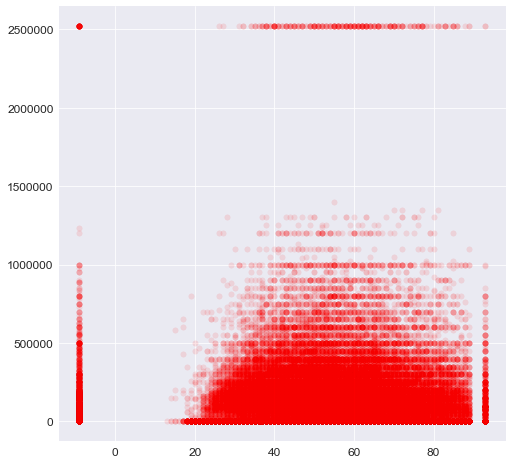

In [172]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.scatter(df['AGE1'], df['VALUE'], color='r', alpha=0.1)
plt.show()

### Remove all rows with AGE1 < 0 and >= 100, and the rows at other corresponding columns

In [173]:
df['AGE1'] = df[df['AGE1'] >= 0]['AGE1']
df['AGE1'] = df[df['AGE1'] < 90]['AGE1']
df = df[pd.notnull(df['AGE1'])]

### Remove all rows with VALUE >= 2000000, and the rows at other corresponding columns

In [174]:
df['VALUE'] = df[df['VALUE'] < 2000000]['VALUE']
df = df[pd.notnull(df['VALUE'])]

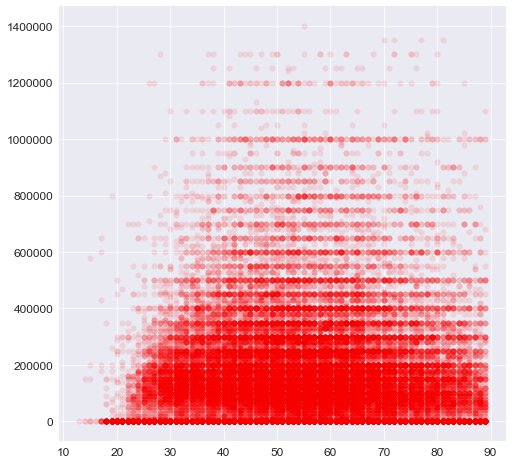

In [175]:
plt.figure(figsize=(8,8))
plt.scatter(df['AGE1'], df['VALUE'], color='r', alpha=0.1)
plt.show()

## Plot scatterplot via Seaborn

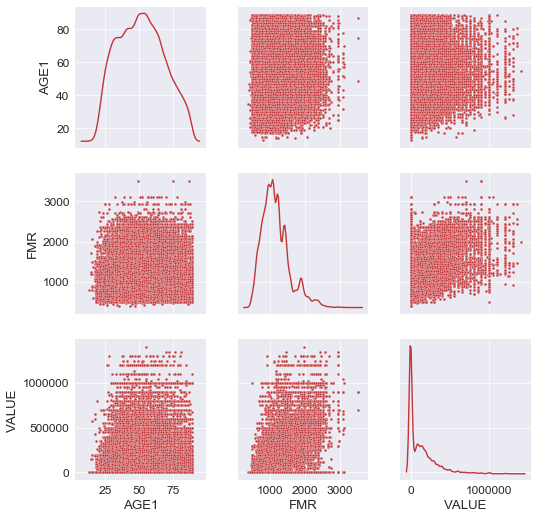

In [176]:
import seaborn as sns
sns.set(style='darkgrid', context='paper', font_scale=1.5, palette="RdBu")

cols = ['AGE1', 'FMR', 'VALUE']
#cols = df.columns.get_values()
#cols = cols.tolist()
#cols = cols[1:4]

sns.pairplot(df[cols], size=2.5, markers=".", diag_kind='kde')
plt.show()

/Users/bbman30/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/bbman30/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


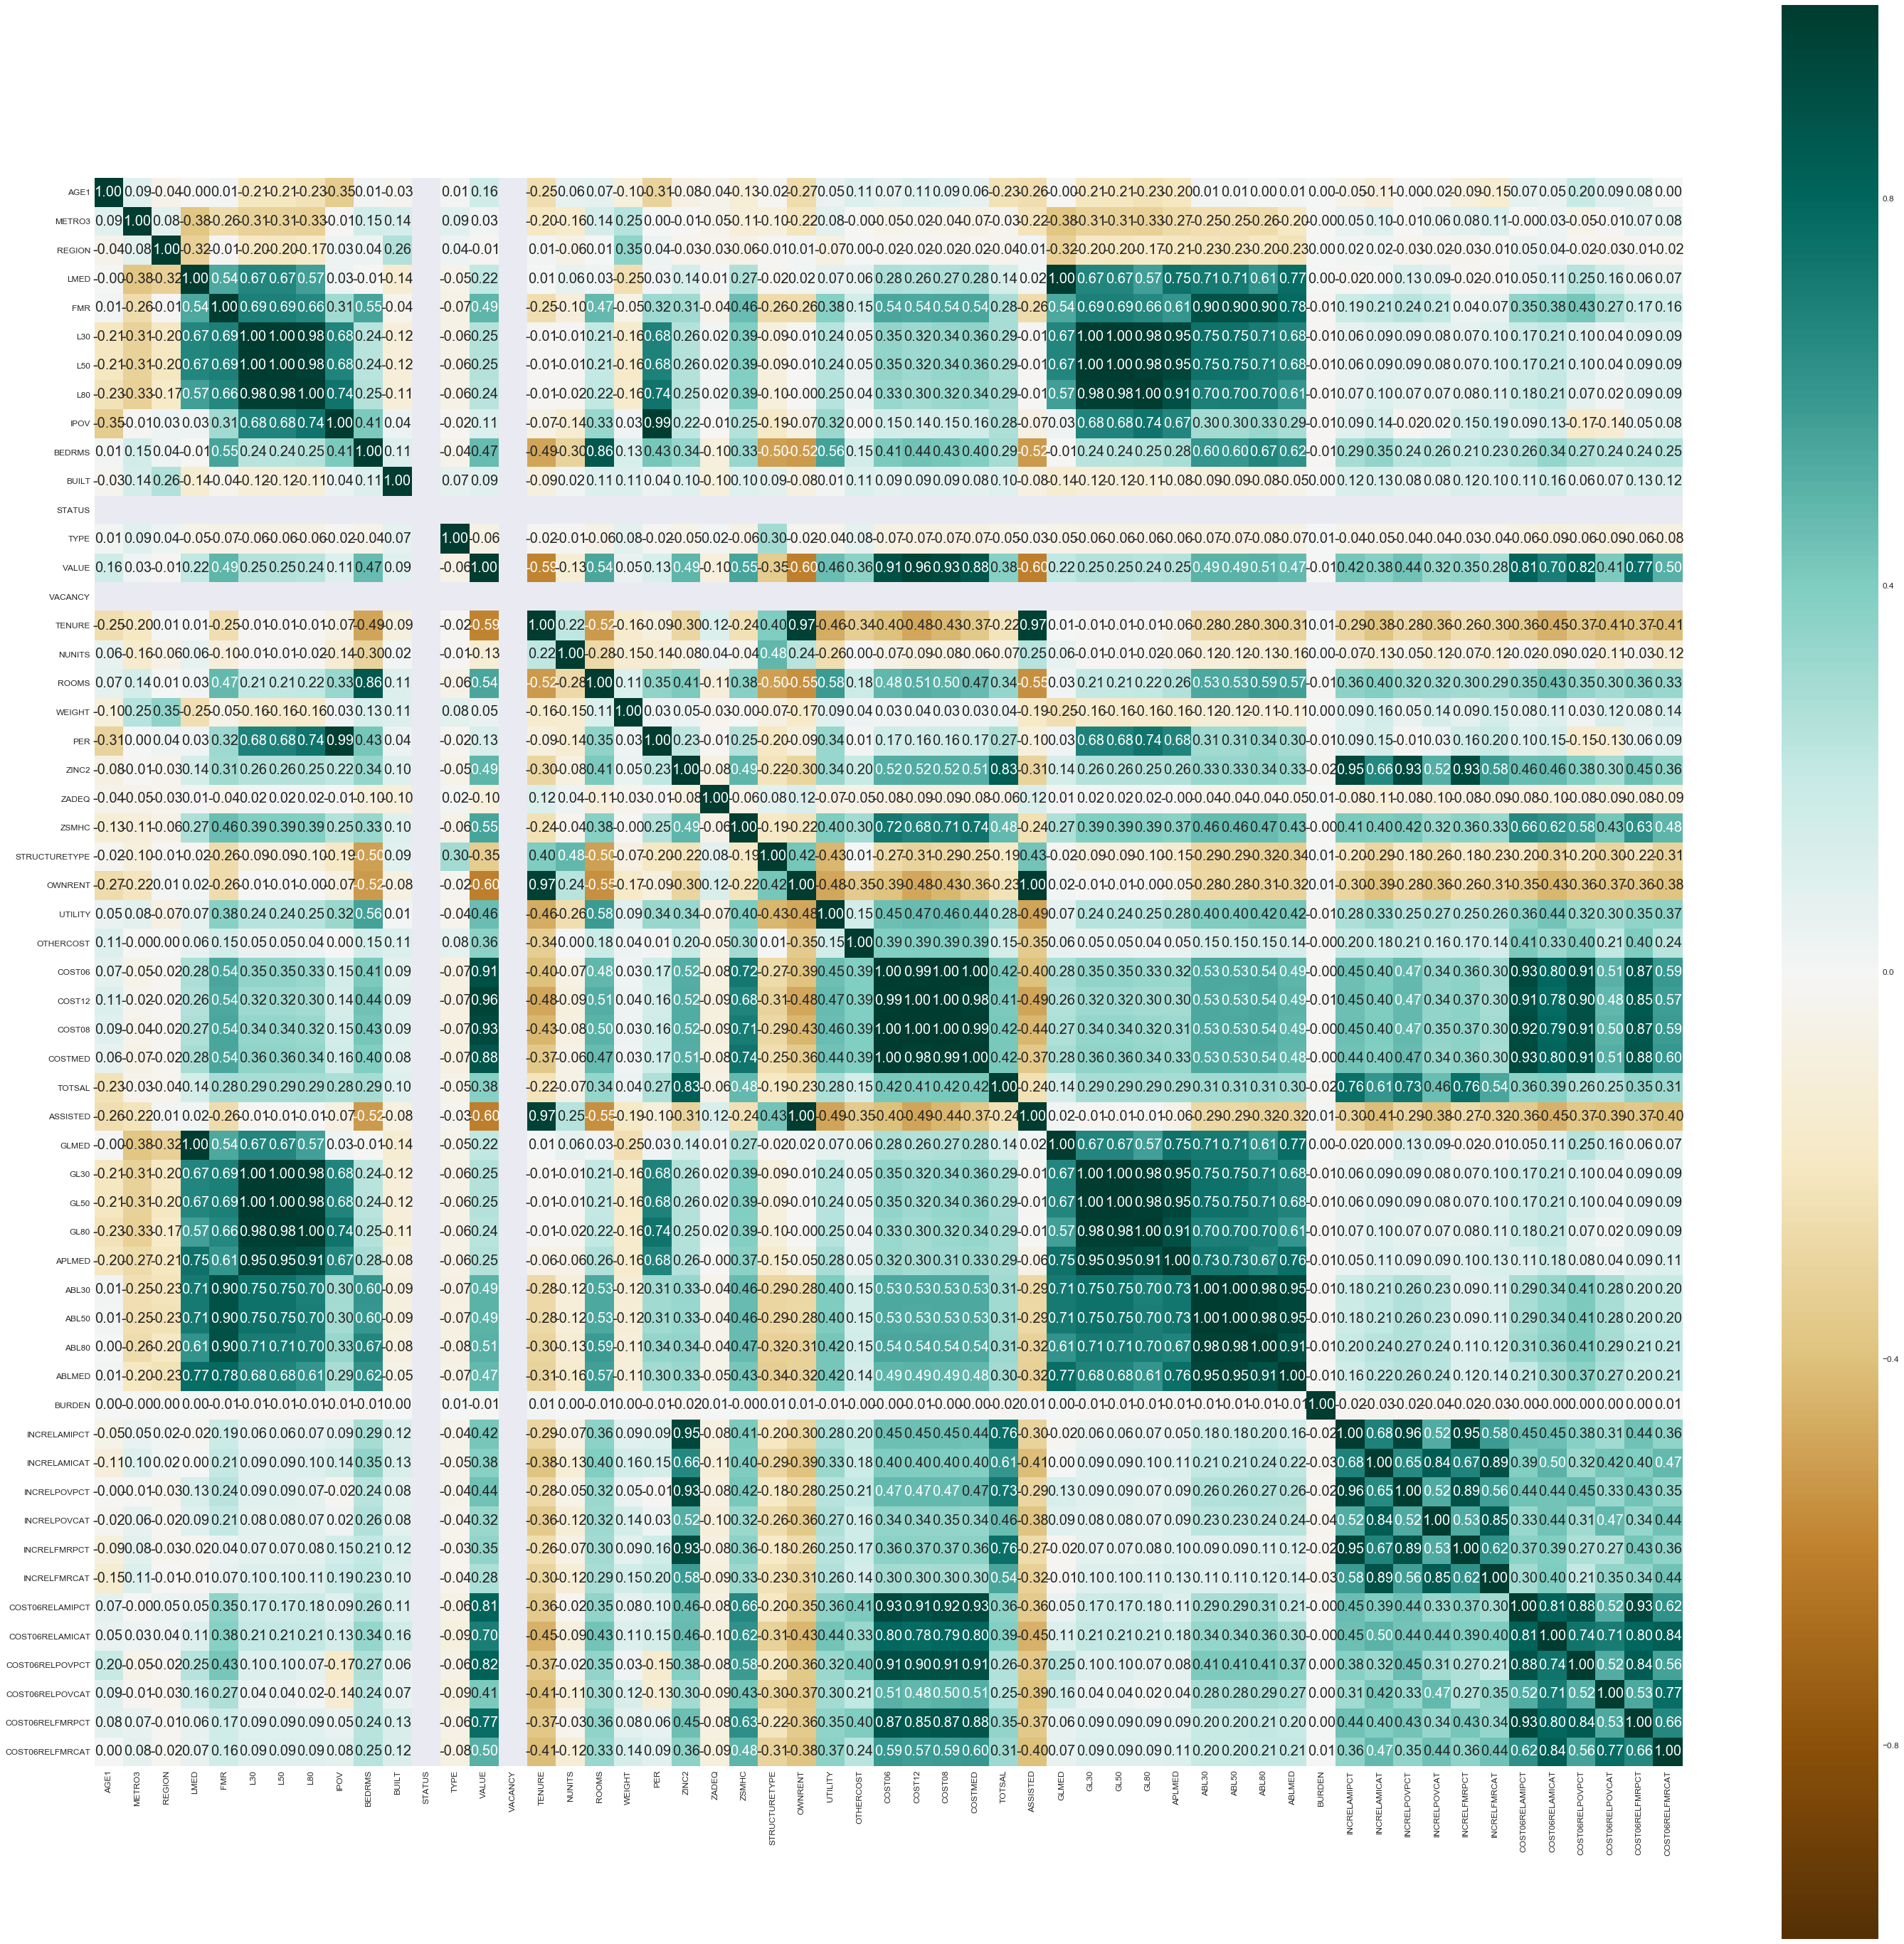

In [177]:
import numpy as np
fig, ax = plt.subplots(figsize=(50,50))

cols = df.columns.get_values()
cols = cols.tolist()
cols = cols[1:56]

cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':20},
                yticklabels=cols,
                xticklabels=cols,
                ax=ax,
                cmap="BrBG")
plt.show()